In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten,Dropout

## get data 

In [2]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

### Let us explore the date to get a better idea about it 

In [3]:
x_train.shape ,x_test.shape ,y_train.shape ,y_test.shape


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
def plot_data(i):
    plt.imshow(x_train[i],cmap='binary')
    plt.title(y_train[i])
    plt.show()

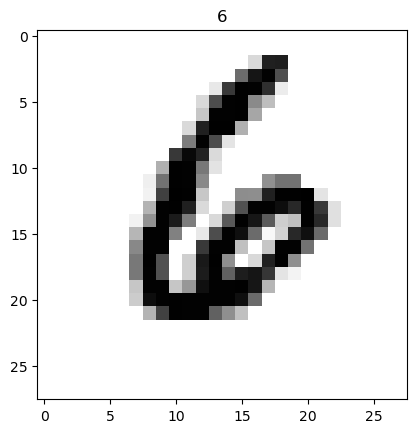

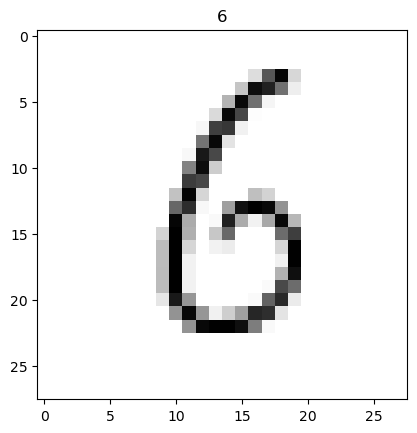

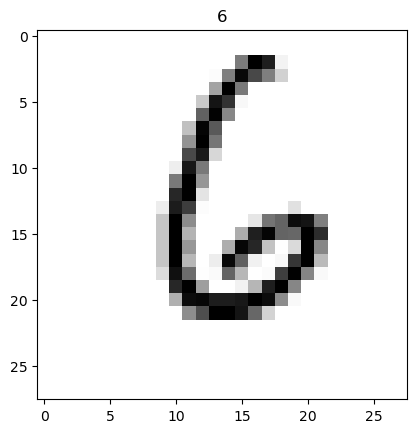

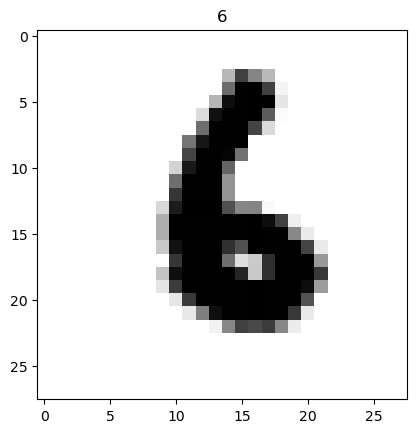

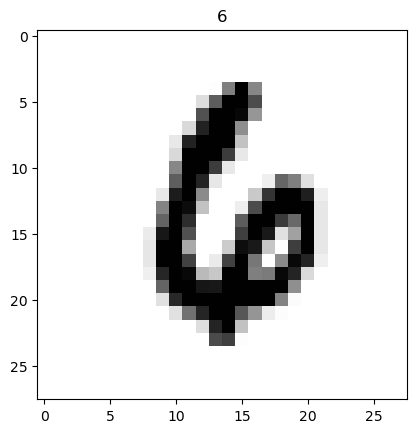

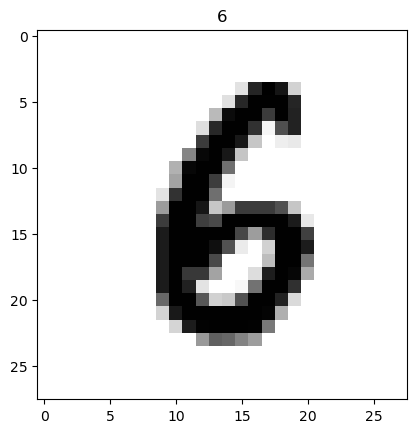

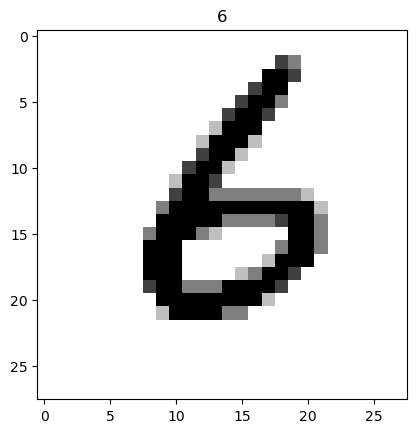

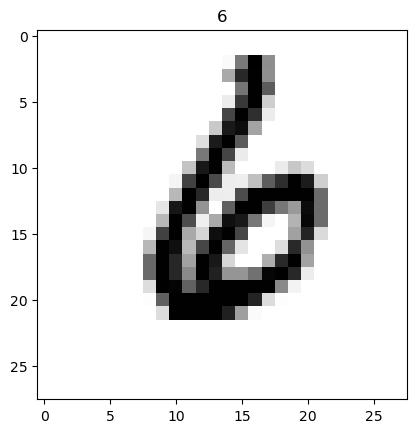

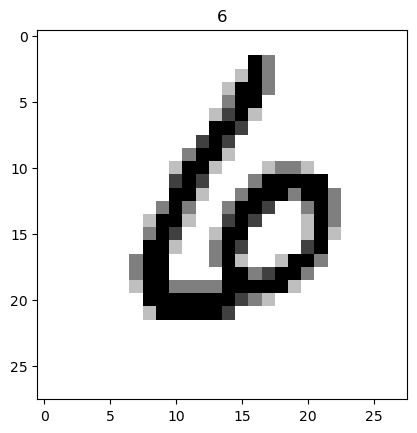

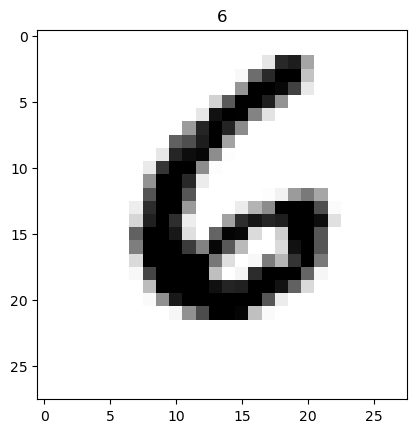

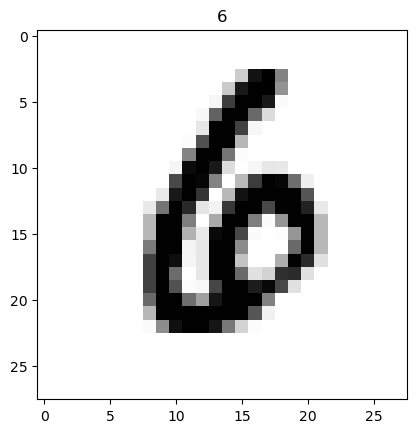

In [6]:
for i in range(100):
    if y_train[i]==6:
        plot_data(i=i)

In [6]:
## pre-process DATA
# normalizing thee data
x_test = x_test.astype(np.float32)/255
x_train = x_train.astype(np.float32)/255

# Reshape/expand data 
x_test = np.expand_dims(x_test,-1)
x_train = np.expand_dims(x_train,-1)

# reshaping results
y_train = keras.utils.to_categorical(y_train)

y_test= keras.utils.to_categorical(y_test)


In [7]:
# model definition
print('3yina model definition')
model= Sequential()
print('hmmm')
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
print('rkhis')
model.add(MaxPool2D((2,2)))
print('hamoda')

model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
print('hamoda rkhis')
model.add(MaxPool2D((2,2)))
print('some shit ')

model.add(Flatten())
print('some other shit ')

model.add(Dropout(0.25))
print('some more shit follwoing the previous shit')

model.add(Dense(10,activation='softmax'))
print('khtak')

3yina model definition
hmmm
rkhis
hamoda
hamoda rkhis
some shit 
some other shit 
some more shit follwoing the previous shit
khtak


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [9]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [10]:
# callbacks
from keras.callbacks import EarlyStopping,ModelCheckpoint

# early stopping 
es= EarlyStopping(monitor='val_accuracy',min_delta=0.01, patience=20, verbose=1)

# Model's checkpoint 
mc=ModelCheckpoint("./bestmodel.h5",monitor="val_accuracy",verbose=1,save_best_only=True)

cb=[es,mc] 

# Training the model


In [11]:
eps=10
vs=0.25
his=model.fit(x_train,y_train,epochs=eps,validation_split=vs, callbacks=cb)

Epoch 1/10
1402/1407 [============================>.] - ETA: 0s - loss: 0.2071 - accuracy: 0.9376
Epoch 1: val_accuracy improved from -inf to 0.97427, saving model to .\bestmodel.h5
1407/1407 [==============================] - 47s 33ms/step - loss: 0.2067 - accuracy: 0.9377 - val_loss: 0.0809 - val_accuracy: 0.9743
Epoch 2/10
1407/1407 [==============================] - ETA: 0s - loss: 0.0709 - accuracy: 0.9787
Epoch 2: val_accuracy improved from 0.97427 to 0.98227, saving model to .\bestmodel.h5
1407/1407 [==============================] - 13s 9ms/step - loss: 0.0709 - accuracy: 0.9787 - val_loss: 0.0586 - val_accuracy: 0.9823
Epoch 3/10
1402/1407 [============================>.] - ETA: 0s - loss: 0.0532 - accuracy: 0.9838
Epoch 3: val_accuracy did not improve from 0.98227
1407/1407 [==============================] - 14s 10ms/step - loss: 0.0534 - accuracy: 0.9837 - val_loss: 0.0578 - val_accuracy: 0.9821
Epoch 4/10
1405/1407 [============================>.] - ETA: 0s - loss: 0.0440 -

# testing & loading the model

In [12]:
model_S= keras.models.load_model('C://Project//AI//mnist//cnn//bestmodel.h5')

In [13]:
score=model_S.evaluate(x_test,y_test)

print(f'the model accuracy is  {score[1]}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0278 - accuracy: 0.9916
the model accuracy is  0.991599977016449
